<a href="https://colab.research.google.com/github/AnIsAsPe/Fundamentos-tecnicos-y-aplicaciones-ML/blob/main/Semana%202/2_2%20Programaci%C3%B3n_l%C3%ADneal_Simplex_Soluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

# Ejercicio:

*Una empresa está estudiando llevar a cabo una campaña publicitaria, para ello dispone de 20 millones de pesos. Puede difundir sus anuncios en dos canales publicitarios distintos, el primero de
ellos cobra 300 mil pesos cada vez que emite un anuncio, mientras que el segundo cobra el doble. La probabilidad de que un anuncio del primer canal sea visto es del 30 %, mientras que del segundo es del 70 %. Como mínimo deben emitirse 26 anuncios en el primer canal y 13 en el segundo.*

Determine el número de anuncios que debe lanzar en cada canal de manera que maximice la probabilidad de que se vea el anuncio de la empresa, teniendo en cuenta la restricción presupuestaria y las del número de anuncios. 











## Planteamiento:


**Maximizar: $~~~~ f(a, b) = 0.3 a + 0.7 b$**


**Restricciones:**

* $300000a + 600000b <= 20000000$     (Presupuesto)
* $a >= 26$ (minimo de anuncios del canal a)
* $b >= 13$ (minimo de anuncios del canal b)
* $a ,~~ b >= 0$  ($a$ y $b$ deben de ser valores no negativos)




## Solución mediante la función linprog() de scipy.optimize

In [3]:
# Vector de coeficientes de la función objetivo a ser minimizada
c1 = np.array([-0.3, -0.7]) 

#Matriz de coeficientes de las restricciones
A1 = np.array([[300000, 600000],[-1, 0], [0, -1], [0,-1],[-1, 0]])

# Vector de inequidades
b1 = np.array([20000000, -26, -13, 0, 0])


# Resolver el problema con programción lineal
res = linprog(c1, A_ub=A1, b_ub=b1)

# Print results
print('Probabilidad de anuncios vistos:', round(res.fun*-1, ndigits=2),
      '\nAnuncios canal 1:', round(res.x[0]),
      '\nBAnuncios canal 2:', round(res.x[1]),
      '\nIteraciones:', res.nit,
      '\nEstatus:', res.message)

Probabilidad de anuncios vistos: 22.03 
Anuncios canal 1: 26 
BAnuncios canal 2: 20 
Iteraciones: 5 
Estatus: Optimization terminated successfully.


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


## Solución gráfica

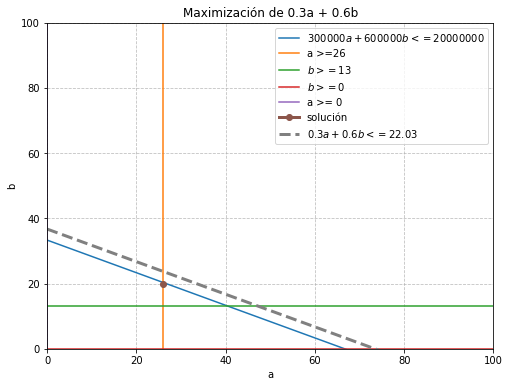

In [4]:
a = np.array([0, 100])

b1 = (20000000 -(300000*a))/600000
b2 = 13 + 0*a
b3 = 0 + 0*a 
b = (22.03 - 0.3*a)/0.6

fig = plt.figure(figsize = (8, 6))

#restricciones
plt.plot(a, b1, label = r'$300000a + 600000b <= 20000000$')
plt.plot((26,26),(0, 100), label ='a >=26')
plt.plot(a, b2, label = r'$b  >= 13$')
plt.plot(a, b3, label = r'$b >= 0$')
plt.plot((0, 0),(0,100), label = 'a >= 0')

plt.plot(26, 20, marker='o', lw=3, label = 'solución')
plt.plot(a, b,  ls = '--', lw=3, color='grey', label = r'$0.3a + 0.6b <= 22.03$')


plt.title ('Maximización de 0.3a + 0.6b')
plt.xlabel('a')
plt.ylabel('b')
plt.ylim(0,100)
plt.xlim(0,100)
plt.grid(alpha=.8, linestyle='--')

plt.legend()
plt.show()